https://www.kaggle.com/datasets/vijayashreer/food-preferences

In [ ]:
#ESTE ES EL DATAFRAME DE UNA ENCUESTA DE COMIDA 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
food= pd.read_csv('Food_Preference.csv') #la columna Gender podria ser 'categorica' al igual que 'Food' and 'Juice'
food.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


In [4]:
food.info() #al parecer solo gender tiene 4 valores nulos o faltantes
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       288 non-null    object
 1   Participant_ID  288 non-null    object
 2   Gender          284 non-null    object
 3   Nationality     288 non-null    object
 4   Age             288 non-null    int64 
 5   Food            288 non-null    object
 6   Juice           288 non-null    object
 7   Dessert         288 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.1+ KB


In [5]:
food.dtypes  #otra forma de ver los tipos de datos

Timestamp         object
Participant_ID    object
Gender            object
Nationality       object
Age                int64
Food              object
Juice             object
Dessert           object
dtype: object

In [6]:
#primero empezare por eliminar la columna 'Participant_Id' el axis= 1 es para indicar que borrare columna
food.drop('Participant_ID', axis=1, inplace=True)#al usar inplace=True afectas directamente la columna borrandola
food.head()

,Timestamp,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,Male,Indian,27,Traditional food,Fresh Juice,Maybe


In [7]:
#quiero ver esos 4 valores nulos o faltantes asi que hare una filtracion
Gender_nulos= food[food['Gender'].isnull()]
Gender_nulos
#Voy a asumir que son gente que se considera no binaria haci que les asignare que esos 4 son 'No Binarios'

,Timestamp,Gender,Nationality,Age,Food,Juice,Dessert
14,2019/05/07 3:09:06 PM GMT+8,NaN,Muslim,27,Traditional food,Fresh Juice,Yes
225,2019/05/08 1:03:16 PM GMT+8,NaN,Indian,30,Traditional food,Fresh Juice,Yes
268,2019/05/10 1:09:22 AM GMT+8,NaN,Indian,23,Traditional food,Fresh Juice,Yes
277,2019/05/10 1:46:27 AM GMT+8,NaN,Indian,26,Traditional food,Fresh Juice,Yes


In [8]:
#ahora reemplazare los valores NaN por 'NonBinary'
food['Gender'].fillna('NonBinary', inplace=True) #Al usar inplace=True, los cambios se aplican directamente al DataFrame food
food.info()
# tambien podria eliminar esas 4 filas con valores faltantes usando food=food.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    288 non-null    object
 1   Gender       288 non-null    object
 2   Nationality  288 non-null    object
 3   Age          288 non-null    int64 
 4   Food         288 non-null    object
 5   Juice        288 non-null    object
 6   Dessert      288 non-null    object
dtypes: int64(1), object(6)
memory usage: 15.9+ KB


In [9]:
#ahora vere como estan con los valores actualizados las  filas que tiene el genero 'No Binario'
filas_nobinarias= food[food['Gender']=='NonBinary']
filas_nobinarias

,Timestamp,Gender,Nationality,Age,Food,Juice,Dessert
14,2019/05/07 3:09:06 PM GMT+8,NonBinary,Muslim,27,Traditional food,Fresh Juice,Yes
225,2019/05/08 1:03:16 PM GMT+8,NonBinary,Indian,30,Traditional food,Fresh Juice,Yes
268,2019/05/10 1:09:22 AM GMT+8,NonBinary,Indian,23,Traditional food,Fresh Juice,Yes
277,2019/05/10 1:46:27 AM GMT+8,NonBinary,Indian,26,Traditional food,Fresh Juice,Yes


In [10]:
#ahora voy a ver que valores tienen algunas columnas

In [11]:
food['Nationality'].value_counts() 

Nationality
Indian         241
Malaysian       10
Indonesia        7
Pakistani        3
Japan            2
MY               2
Maldivian        2
Pakistani        2
Algerian         1
Mauritian        1
China            1
Malaysia         1
Indonesian       1
Indonesain       1
Seychellois      1
Korean           1
Malaysia         1
Nigerian         1
Canadian         1
MALAYSIAN        1
Indonesian       1
Malaysian        1
Maldivian        1
Pakistan         1
Muslim           1
Tanzanian        1
Yemen            1
Name: count, dtype: int64

In [12]:
food['Food'].value_counts()

Food
Traditional food    238
Western Food         50
Name: count, dtype: int64

In [13]:
food['Juice'].value_counts()

Juice
Fresh Juice          256
Carbonated drinks     32
Name: count, dtype: int64

In [14]:
food['Dessert'].value_counts()

Dessert
Maybe    122
Yes      114
No        52
Name: count, dtype: int64

In [15]:
food['Age'].value_counts()

Age
25    23
24    20
27    18
30    15
28    14
23    14
40    12
26    12
38    11
21    11
19    10
22    10
33     9
37     8
34     8
20     7
35     7
31     7
29     6
39     6
42     5
36     5
13     4
45     4
54     4
32     4
50     3
18     3
9      3
56     2
80     2
60     2
16     2
47     2
12     1
17     1
44     1
51     1
49     1
43     1
65     1
53     1
74     1
15     1
8      1
63     1
67     1
59     1
46     1
Name: count, dtype: int64

In [16]:
food['Gender'].value_counts()

Gender
Female       165
Male         119
NonBinary      4
Name: count, dtype: int64

In [17]:
#algunas de las columnas solo tienen 2 o 3 valores asi que cambiare el tipo de dato de 'object' a 'category'

In [18]:
columnas_a_category=['Food', 'Juice', 'Dessert', 'Gender']

food[columnas_a_category]= food[columnas_a_category].astype('category')

food.dtypes

Timestamp        object
Gender         category
Nationality      object
Age               int64
Food           category
Juice          category
Dessert        category
dtype: object

In [19]:
food.head()

,Timestamp,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,Male,Indian,27,Traditional food,Fresh Juice,Maybe


In [20]:
#ahora procedere a graficar con grafica de pastel, los generos 

In [21]:
food['Gender'].value_counts() #con este metodo podemos ver cuantas personas fueron encuestadas por 
                                   #genero

Gender
Female       165
Male         119
NonBinary      4
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

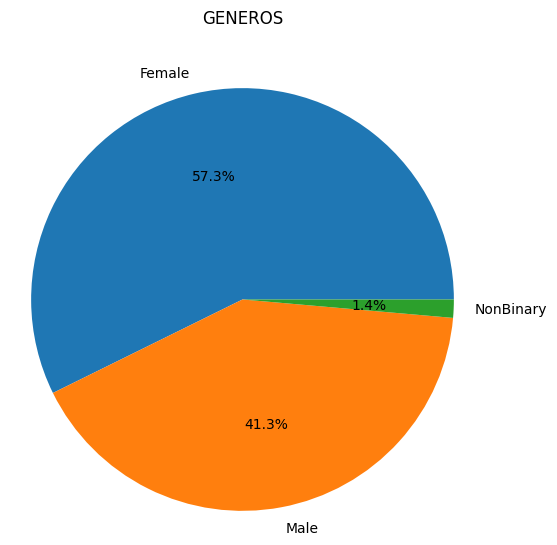

In [27]:
generos= food['Gender'].value_counts()
#luego creamos la grafica 'pie'
plt.figure(figsize=(6, 6))
plt.pie(generos, labels=generos.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('GENEROS', y=1.08)
plt.show

In [ ]:
#la grafica pastel muestra que fueron mas las mujeres que fueron encuestadas

In [28]:
#ahora graficare las nacionalidades
conteos= food['Nationality'].value_counts()

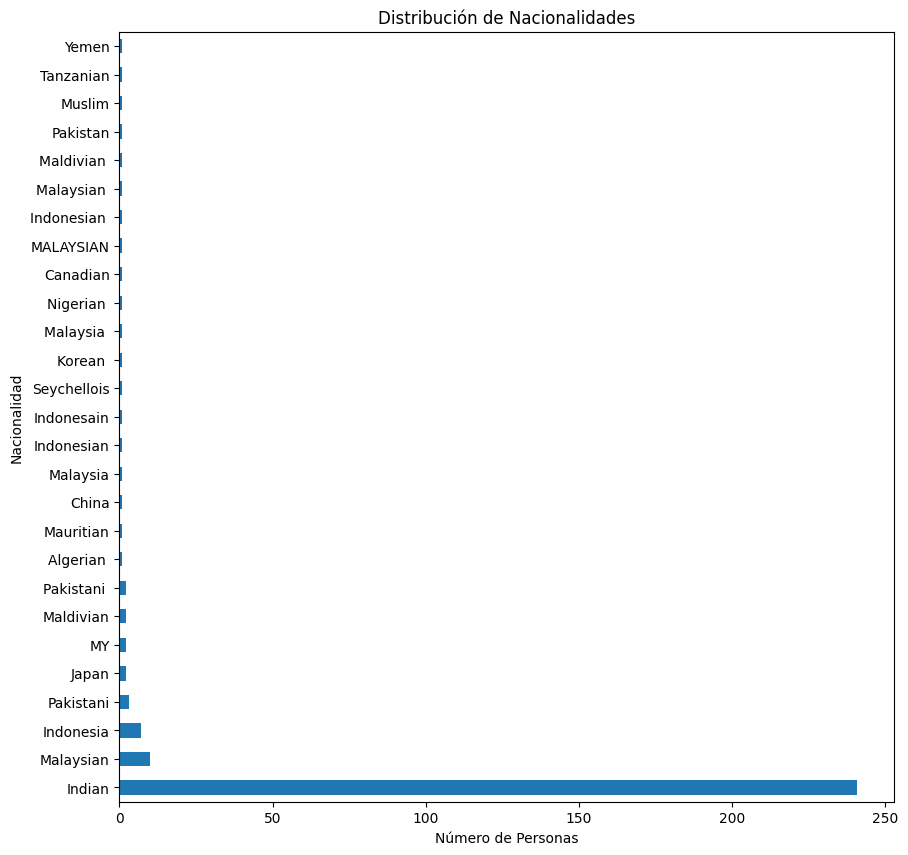

In [33]:
#creare una grafica de barras horizontal
plt.figure(figsize=(10, 10))
conteos.plot(kind='barh')
plt.xlabel('Número de Personas')
plt.ylabel('Nacionalidad')
plt.title('Distribución de Nacionalidades')
plt.show()

In [ ]:
#la grafica me demuestra que las personas que mas fueron encuestadas son las de india

In [38]:
#el siguiente codigo es para mostrar el porcentaje de participacion de las nacionalidades de otra forma
porcentaje= food['Nationality'].value_counts(normalize=True)*100
porcentaje

Nationality
Indian         83.680556
Malaysian       3.472222
Indonesia       2.430556
Pakistani       1.041667
Japan           0.694444
MY              0.694444
Maldivian       0.694444
Pakistani       0.694444
Algerian        0.347222
Mauritian       0.347222
China           0.347222
Malaysia        0.347222
Indonesian      0.347222
Indonesain      0.347222
Seychellois     0.347222
Korean          0.347222
Malaysia        0.347222
Nigerian        0.347222
Canadian        0.347222
MALAYSIAN       0.347222
Indonesian      0.347222
Malaysian       0.347222
Maldivian       0.347222
Pakistan        0.347222
Muslim          0.347222
Tanzanian       0.347222
Yemen           0.347222
Name: proportion, dtype: float64

In [ ]:
#india fue el mas encuestado con un 83% de las personas ocupan esa encuesta

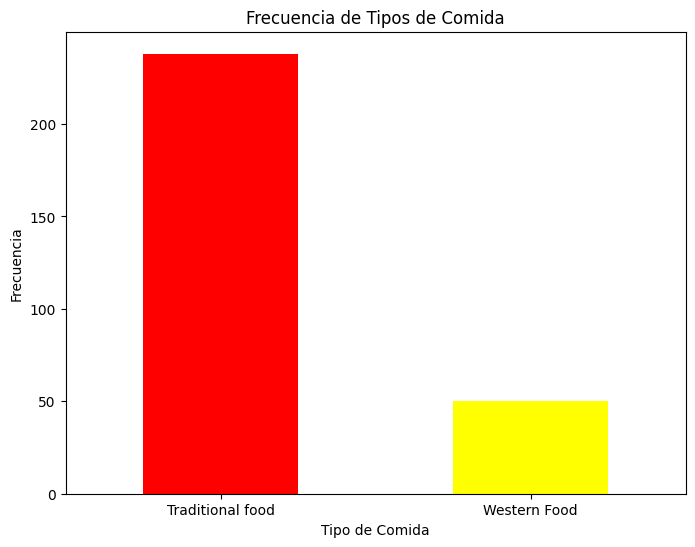

In [40]:
#por ultimo hare una grafica que muestre que tipo de comida prefieren mas los encuestados
comidas= food['Food'].value_counts()

plt.figure(figsize=(8, 6))
comidas.plot(kind='bar', color=['red', 'yellow'])
plt.xlabel('Tipo de Comida')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipos de Comida')
plt.xticks(rotation=0)  # Para evitar la rotación de las etiquetas del eje x
plt.show()

In [ ]:
#aqui muestra que los encuestados('que la gran mayoria fueron de india y sus alrededores')
#prefieren la comida tradicional de su pais, a la comida extranjera